In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# sample dataset
data = {
    'teacher_id': list(range(1, 21)),
    'gender': ['M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M',
               'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
    'beauty': [6.2, 7.8, 5.5, 8.3, 7.0, 5.8, 8.0, 6.0, 7.5, 5.9,
               8.2, 6.4, 7.1, 5.7, 8.4, 6.8, 7.9, 5.6, 8.1, 6.1],
    'rating': [4.5, 4.8, 4.0, 4.9, 4.7, 3.9, 4.8, 4.1, 4.6, 4.2,
               4.9, 4.3, 4.5, 3.8, 4.9, 4.4, 4.7, 3.9, 4.8, 4.1],
    'tenure': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
               'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'students': [60, 45, 80, 50, 40, 75, 55, 65, 70, 85,
                 90, 55, 60, 50, 65, 45, 75, 70, 55, 60]
}

df = pd.DataFrame(data)
df

,teacher_id,gender,beauty,rating,tenure,students
0,1,M,6.2,4.5,Yes,60
1,2,F,7.8,4.8,No,45
2,3,M,5.5,4.0,Yes,80
3,4,F,8.3,4.9,No,50
4,5,F,7.0,4.7,Yes,40
5,6,M,5.8,3.9,Yes,75
6,7,F,8.0,4.8,No,55
7,8,M,6.0,4.1,Yes,65
8,9,F,7.5,4.6,No,70
9,10,M,5.9,4.2,Yes,85


In [ ]:
# Q1. Identify whether teachers Rating Data is time series or cross sectional
print("The Teachers Rating Data is Cross-Sectional — because it captures \
data for different teachers at a single point in time, not over multiple time periods.")

The Teachers Rating Data is Cross-Sectional — because it captures data for different teachers at a single point in time, not over multiple time periods.


In [ ]:
# Q2. Find mean, median, min, max for students
print("Mean students:", df['students'].mean())
print("Median students:", df['students'].median())
print("Min students:", df['students'].min())
print("Max students:", df['students'].max(), "\n")

Mean students: 62.5
Median students: 60.0
Min students: 40
Max students: 90 



In [ ]:
# Q3. Produce descriptive statistics table
print("Descriptive Statistics Table:\n", df.describe())

Descriptive Statistics Table:
        teacher_id     beauty    rating   students
count    20.00000  20.000000  20.00000  20.000000
mean     10.50000   6.915000   4.44000  62.500000
std       5.91608   1.032766   0.37613  13.812656
min       1.00000   5.500000   3.80000  40.000000
25%       5.75000   5.975000   4.10000  53.750000
50%      10.50000   6.900000   4.50000  60.000000
75%      15.25000   7.925000   4.80000  71.250000
max      20.00000   8.400000   4.90000  90.000000


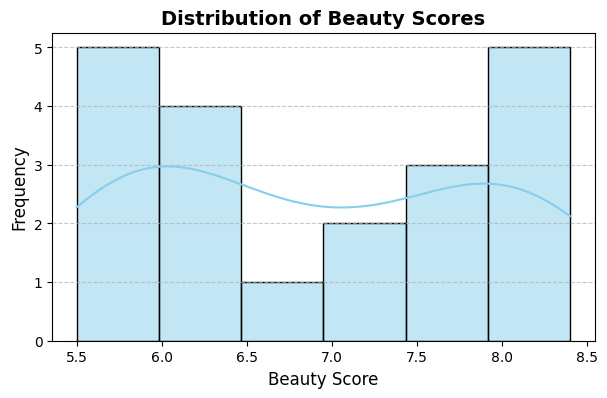

The histogram shows two main clusters: one around beauty scores 5.5–6.0 
and another near 7.8–8.2. This indicates a bimodal distribution. 
Slight left-skew is visible, as slightly more teachers fall in the lower beauty range.


In [ ]:
# Q4. Create histogram of beauty variable
plt.figure(figsize=(7, 4))
sns.histplot(df['beauty'], color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Beauty Scores', fontsize=14, fontweight='bold')
plt.xlabel('Beauty Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("The histogram shows two main clusters: one around beauty scores 5.5–6.0 \n"
      "and another near 7.8–8.2. This indicates a bimodal distribution. \n"
      "Slight left-skew is visible, as slightly more teachers fall in the lower beauty range.")


In [ ]:
# Q5. Does average beauty score differ by gender?
beauty_by_gender = df.groupby('gender')['beauty'].agg(['mean', 'std'])
print(f"Q5. Average Beauty Score by Gender:\n {beauty_by_gender} \n")

print("Female instructors have a higher average beauty score than male instructors.")

Q5. Average Beauty Score by Gender:
         mean       std
gender                
F       7.83  0.485455
M       6.00  0.394405 

Female instructors have a higher average beauty score than male instructors.


In [ ]:
# Q6. Calculate percentage of males and females that are tenured
tenure_percent = df.groupby(['gender', 'tenure']).size().unstack(fill_value=0)
print(f"{tenure_percent} \n")

tenure_percent['Percentage_Tenured'] = (tenure_percent['Yes'] / tenure_percent.sum(axis=1)) * 100
print(f"Tenure Percentage by Gender:\n {tenure_percent[['Percentage_Tenured']]} \n")

print("Based on percentages, tenure status slightly differs by gender \n \
        Males appear to have a higher tenure rate in this small dataset")

tenure  No  Yes
gender         
F        6    4
M        2    8 

Tenure Percentage by Gender:
 tenure  Percentage_Tenured
gender                    
F                     40.0
M                     80.0 

Based on percentages, tenure status slightly differs by gender 
         Males appear to have a higher tenure rate in this small dataset
